In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
import seaborn as sns
Iris = sns.load_dataset('iris')
Titanic = sns.load_dataset('titanic')
mpg = sns.load_dataset('mpg')

In [4]:
# 1 - a
Iris.groupby('species').agg(['mean','std'])

sepal_length           sepal_width           petal_length  \
                   mean       std        mean       std         mean   
species                                                                
setosa            5.006  0.352490       3.428  0.379064        1.462   
versicolor        5.936  0.516171       2.770  0.313798        4.260   
virginica         6.588  0.635880       2.974  0.322497        5.552   

                     petal_width            
                 std        mean       std  
species                                     
setosa      0.173664       0.246  0.105386  
versicolor  0.469911       1.326  0.197753  
virginica   0.551895       2.026  0.274650

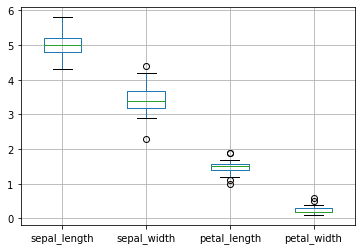

In [6]:
# 1-b)
Iris[Iris.species == 'setosa'].boxplot();

In [7]:
s = Iris[Iris.species == 'setosa']['sepal_width']
q1, q3 = s.quantile(0.25), s.quantile(0.75)
iqr = q3 - q1
q1, q3, iqr

(3.2, 3.6750000000000003, 0.4750000000000001)

In [8]:
s.mean(), s.std()

(3.428000000000001, 0.3790643690962886)

In [9]:
upper_limit = q3 + 1.5 * iqr
lower_limit = q1 - 1.5 * iqr
s[(s < lower_limit) | (s > upper_limit)] = np.nan
s.mean(), s.std(), s.isna().sum()

(3.4312500000000004, 0.32034306743094015, 2)

In [1]:
# 한 품종의 피쳐를 받아서 이상치를 제거하고 평균, 표준편차, 이상치 갯수를
# 반환하는 함수
def get_newstat(s):
    q1, q3 = s.quantile(0.25), s.quantile(0.75)
    iqr = q3 - q1
    upper_limit = q3 + 1.5 * iqr
    lower_limit = q1 - 1.5 * iqr
    s[(s < lower_limit) | (s > upper_limit)] = np.nan
    return s.mean(), s.std(), s.isna().sum()

In [7]:
for species in Iris.species.unique():
    for column in Iris.columns[:-1]:
        s = Iris[Iris.species == species][column]
        new_mean, new_std, outlier = get_newstat(s)
        print(species, column, new_mean, new_std, outlier)

setosa sepal_length 5.005999999999999 0.3524896872134512 0
setosa sepal_width 3.4312500000000004 0.32034306743094015 2
setosa petal_length 1.4608695652173913 0.12906201931985212 4
setosa petal_width 0.23333333333333328 0.08588298157855664 2
versicolor sepal_length 5.936 0.5161711470638635 0
versicolor sepal_width 2.7700000000000005 0.3137983233784114 0
versicolor petal_length 4.285714285714285 0.4377975178854565 1
versicolor petal_width 1.3259999999999998 0.197752680004544 0
virginica sepal_length 6.6224489795918355 0.593459246748267 1
virginica sepal_width 2.95531914893617 0.26027452951125174 3
virginica petal_length 5.552 0.5518946956639835 0
virginica petal_width 2.026 0.27465005563666733 0


In [14]:
line = []
for species in Iris.species.unique():
    for column in Iris.columns[:-1]:
        s = Iris[Iris.species == species][column]
        old_mean, old_std = s.mean(), s.std()
        new_mean, new_std, outlier = get_newstat(s)
        line.append([species, column, round(old_mean,3), round(old_std,4), round(new_mean,3), round(new_std,4), outlier])

df = pd.DataFrame(line, columns=['species','column','old_mean','old_std','outlier갯수','new_mean','new_std'])
df.set_index(['species','column'], inplace=True)
df

old_mean  old_std  outlier갯수  new_mean  new_std
species    column                                                       
setosa     sepal_length     5.006   0.3525      5.006    0.3525        0
           sepal_width      3.428   0.3791      3.431    0.3203        2
           petal_length     1.462   0.1737      1.461    0.1291        4
           petal_width      0.246   0.1054      0.233    0.0859        2
versicolor sepal_length     5.936   0.5162      5.936    0.5162        0
           sepal_width      2.770   0.3138      2.770    0.3138        0
           petal_length     4.260   0.4699      4.286    0.4378        1
           petal_width      1.326   0.1978      1.326    0.1978        0
virginica  sepal_length     6.588   0.6359      6.622    0.5935        1
           sepal_width      2.974   0.3225      2.955    0.2603        3
           petal_length     5.552   0.5519      5.552    0.5519        0
           petal_width      2.026   0.2747      2.026    0.2747        0

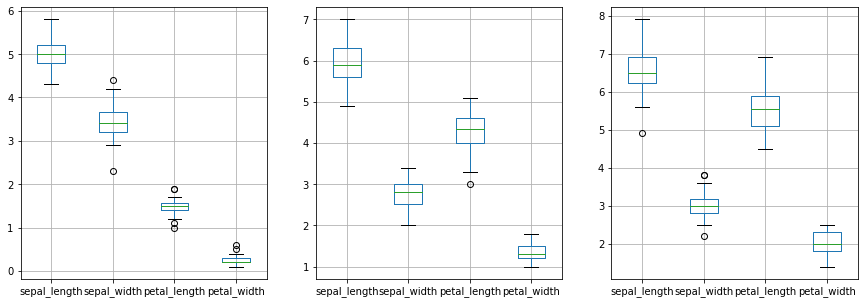

In [15]:
plt.figure(figsize=(15,5))
plt.subplot(131)
Iris[Iris.species == 'setosa'].boxplot()
plt.subplot(1,3,2)
Iris[Iris.species == 'versicolor'].boxplot()
plt.subplot(133)
Iris[Iris.species == 'virginica'].boxplot()
plt.show()

### Q2. Titanic

In [18]:
Titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [19]:
# 2-a
Titanic['category1'] = Titanic.apply(lambda x: x.sex if x.age > 20 else 'child', axis=1)
Titanic.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,category1
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True,male
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True,child
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False,child
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True,male
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True,male


In [20]:
# 2-b
Titanic.age = Titanic.age.fillna(Titanic.age.mean())
Titanic['category1'] = Titanic.apply(lambda x: x.sex if x.age > 20 else 'child', axis=1)
Titanic.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,category1
886,0,2,male,27.000000,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True,male
887,1,1,female,19.000000,0,0,30.00,S,First,woman,False,B,Southampton,yes,True,child
888,0,3,female,29.699118,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False,female
889,1,1,male,26.000000,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True,male
890,0,3,male,32.000000,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True,male


In [21]:
Titanic.shape

(891, 16)

In [22]:
# 2-c
Titanic.groupby('sex')['survived'].mean()

sex
female    0.742038
male      0.188908
Name: survived, dtype: float64

In [23]:
Titanic.groupby('embarked')['survived'].mean()

embarked
C    0.553571
Q    0.389610
S    0.336957
Name: survived, dtype: float64

In [24]:
Titanic.groupby(['sex','pclass'])['survived'].mean()

sex     pclass
female  1         0.968085
        2         0.921053
        3         0.500000
male    1         0.368852
        2         0.157407
        3         0.135447
Name: survived, dtype: float64

### Q3.MPG

In [25]:
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [27]:
# 3-a
mpg['hp_per_cc'] = mpg.horsepower / mpg.displacement
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,hp_per_cc
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu,0.423453
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320,0.471429
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite,0.471698
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst,0.493421
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino,0.463576


In [28]:
name = 'chevrolet chevelle malibu'
manu = name.split()[0]
manu

'chevrolet'

In [29]:
name.split()

['chevrolet', 'chevelle', 'malibu']

In [30]:
len = len(manu)
len

9

In [31]:
name[len+1:]

'chevelle malibu'

In [32]:
name.split()[1:]

['chevelle', 'malibu']

In [33]:
' '.join(name.split()[1:])

'chevelle malibu'

In [34]:
mpg['manu'] = mpg.name.apply(lambda x: x.split()[0])
mpg['model'] = mpg.name.apply(lambda x: ' '.join(x.split()[1:]))
mpg.drop(columns=['name'], inplace=True)
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,hp_per_cc,manu,model
0,18.0,8,307.0,130.0,3504,12.0,70,usa,0.423453,chevrolet,chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,0.471429,buick,skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,0.471698,plymouth,satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,0.493421,amc,rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,0.463576,ford,torino


In [35]:
# 3-c
mpg.groupby('cylinders')['mpg'].mean()

cylinders
3    20.550000
4    29.286765
5    27.366667
6    19.985714
8    14.963107
Name: mpg, dtype: float64

In [36]:
# 3-d
mpg.groupby('origin')['hp_per_cc'].mean()

origin
europe    0.740005
japan     0.789485
usa       0.512063
Name: hp_per_cc, dtype: float64

In [37]:
# 3-e
# 모델이 5개 이상인 제조사
mpg.groupby('manu')['model'].count()

manu
amc              28
audi              7
bmw               2
buick            17
cadillac          2
capri             1
chevroelt         1
chevrolet        43
chevy             3
chrysler          6
datsun           23
dodge            28
fiat              8
ford             51
hi                1
honda            13
maxda             2
mazda            10
mercedes          1
mercedes-benz     2
mercury          11
nissan            1
oldsmobile       10
opel              4
peugeot           8
plymouth         31
pontiac          16
renault           5
saab              4
subaru            4
toyota           25
toyouta           1
triumph           1
vokswagen         1
volkswagen       15
volvo             6
vw                6
Name: model, dtype: int64

In [38]:
mpg.manu.value_counts()

ford             51
chevrolet        43
plymouth         31
dodge            28
amc              28
toyota           25
datsun           23
buick            17
pontiac          16
volkswagen       15
honda            13
mercury          11
oldsmobile       10
mazda            10
peugeot           8
fiat              8
audi              7
vw                6
volvo             6
chrysler          6
renault           5
opel              4
subaru            4
saab              4
chevy             3
mercedes-benz     2
maxda             2
cadillac          2
bmw               2
nissan            1
chevroelt         1
capri             1
mercedes          1
triumph           1
vokswagen         1
toyouta           1
hi                1
Name: manu, dtype: int64

In [41]:
s = mpg.manu.value_counts()
s[s >= 5]

ford          51
chevrolet     43
plymouth      31
dodge         28
amc           28
toyota        25
datsun        23
buick         17
pontiac       16
volkswagen    15
honda         13
mercury       11
oldsmobile    10
mazda         10
peugeot        8
fiat           8
audi           7
vw             6
volvo          6
chrysler       6
renault        5
Name: manu, dtype: int64

In [42]:
big_manu = s[s >= 5].index
big_manu

Index(['ford', 'chevrolet', 'plymouth', 'dodge', 'amc', 'toyota', 'datsun',
       'buick', 'pontiac', 'volkswagen', 'honda', 'mercury', 'oldsmobile',
       'mazda', 'peugeot', 'fiat', 'audi', 'vw', 'volvo', 'chrysler',
       'renault'],
      dtype='object')

In [43]:
'ford' in big_manu

True

In [44]:
# 전체 데이터 중에서 모델이 5개 이상인 제조사를 filtering
big_mpg =  mpg[mpg.manu.isin(big_manu)]
mpg.shape, big_mpg.shape

((398, 11), (367, 11))

In [45]:
big_mpg.groupby('manu')['mpg'].mean()

manu
amc           18.246429
audi          26.714286
buick         19.182353
chevrolet     20.472093
chrysler      17.266667
datsun        31.113043
dodge         22.060714
fiat          28.912500
ford          19.694118
honda         33.761538
mazda         30.860000
mercury       19.118182
oldsmobile    21.100000
peugeot       23.687500
plymouth      21.703226
pontiac       20.012500
renault       32.880000
toyota        28.372000
volkswagen    29.106667
volvo         21.116667
vw            39.016667
Name: mpg, dtype: float64

In [46]:
big_mpg.groupby('manu')['mpg'].mean().sort_values(ascending=False).head()

manu
vw         39.016667
honda      33.761538
renault    32.880000
datsun     31.113043
mazda      30.860000
Name: mpg, dtype: float64

### 복잡한 자료구조에서 데이터 꺼내기

In [47]:
# 도로명주소 API에서 '산굼부리'로 검색한 결과
result = {'results': {'common': {'errorMessage': '정상',
    'countPerPage': '10',
    'totalCount': '1',
    'errorCode': '0',
    'currentPage': '1'},
    'juso': [{'detBdNmList': '',
    'engAddr': '768, Bijarim-ro, Jocheon-eup, Jeju-si, Jeju-do',
    'rn': '비자림로',
    'emdNm': '조천읍',
    'zipNo': '63346',
    'roadAddrPart2': '',
    'emdNo': '02',
    'sggNm': '제주시',
    'jibunAddr': '제주특별자치도 제주시 조천읍 교래리 342-2 산굼부리',
    'siNm': '제주특별자치도',
    'roadAddrPart1': '제주특별자치도 제주시 조천읍 비자림로 768',
    'bdNm': '산굼부리',
    'admCd': '5011025929',
    'udrtYn': '0',
    'lnbrMnnm': '342',
    'roadAddr': '제주특별자치도 제주시 조천읍 비자림로 768',
    'lnbrSlno': '2',
    'buldMnnm': '768',
    'bdKdcd': '0',
    'liNm': '교래리',
    'rnMgtSn': '501103349079',
    'mtYn': '0',
    'bdMgtSn': '5011025929003420005071420',
    'buldSlno': '0'}]}}

In [59]:
type(result['results'])

dict

In [61]:
result['results'].keys()

dict_keys(['common', 'juso'])

In [62]:
type(result['results']['juso'])

list

In [63]:
result['results']['juso'][0]

{'detBdNmList': '',
 'engAddr': '768, Bijarim-ro, Jocheon-eup, Jeju-si, Jeju-do',
 'rn': '비자림로',
 'emdNm': '조천읍',
 'zipNo': '63346',
 'roadAddrPart2': '',
 'emdNo': '02',
 'sggNm': '제주시',
 'jibunAddr': '제주특별자치도 제주시 조천읍 교래리 342-2 산굼부리',
 'siNm': '제주특별자치도',
 'roadAddrPart1': '제주특별자치도 제주시 조천읍 비자림로 768',
 'bdNm': '산굼부리',
 'admCd': '5011025929',
 'udrtYn': '0',
 'lnbrMnnm': '342',
 'roadAddr': '제주특별자치도 제주시 조천읍 비자림로 768',
 'lnbrSlno': '2',
 'buldMnnm': '768',
 'bdKdcd': '0',
 'liNm': '교래리',
 'rnMgtSn': '501103349079',
 'mtYn': '0',
 'bdMgtSn': '5011025929003420005071420',
 'buldSlno': '0'}

In [64]:
result['results']['juso'][0]['roadAddr']

'제주특별자치도 제주시 조천읍 비자림로 768'

In [65]:
#
result = {'documents': [{'address': {'address_name': '강원 강릉시 저동 94',
'b_code': '4215013700',
'h_code': '4215066500',
'main_address_no': '94',
'mountain_yn': 'N',
'region_1depth_name': '강원',
'region_2depth_name': '강릉시',
'region_3depth_h_name': '경포동',
'region_3depth_name': '저동',
'sub_address_no': '',
'x': '128.896538649542',
'y': '37.7955687639648'},
'address_name': '강원 강릉시 경포로 365',
'address_type': 'ROAD_ADDR',
'road_address': {'address_name': '강원 강릉시 경포로 365',
'building_name': '경포대',
'main_building_no': '365',
'region_1depth_name': '강원',
'region_2depth_name': '강릉시',
'region_3depth_name': '저동',
'road_name': '경포로',
'sub_building_no': '',
'underground_yn': 'N',
'x': '128.896538649542',
'y': '37.7955687639648',
'zone_no': '25461'},
'x': '128.896538649542',
'y': '37.7955687639648'}],
'meta': {'is_end': True, 'pageable_count': 1, 'total_count': 1}}

In [73]:
result.keys()

dict_keys(['documents', 'meta'])

In [74]:
result['documents'][0]['x']

'128.896538649542'

In [76]:
lng = float(result['documents'][0]['x'])
lat = float(result['documents'][0]['y'])
lng, lat

(128.896538649542, 37.7955687639648)